In [37]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus']=False

### datetime 라이브러리

In [3]:
dt = datetime(1999, 12, 23, 5, 12, 13)
type(dt)

datetime.datetime

In [4]:
# datetime형에서 year, month, day, hour, minute, second 정보 추출
dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second

(1999, 12, 23, 5, 12, 13)

In [9]:
# 현재 시간
datetime.now()
datetime.today()

datetime.datetime(2021, 3, 4, 16, 25, 42, 674682)

In [13]:
# 시간 계산
t1 = datetime(1970, 1, 1)
t2 = datetime(1970, 12, 12, 13, 24, 24)
print(t1, t2)
print(t2 - t1)

1970-01-01 00:00:00 1970-12-12 13:24:24
345 days, 13:24:24


In [16]:
# 문자열을 datetime형으로 변환(기본 형식)
data = [[1, 2], [3, 4], [5, 6]]
df = pd.DataFrame(data, index=['2019-01-01', '2020-01-01', '2021-01-01'])
display(df)
print(type(df.index))
print()
df.index = pd.to_datetime(df.index)
display(df)
print(type(df.index))

,0,1
2019-01-01,1,2
2020-01-01,3,4
2021-01-01,5,6


<class 'pandas.core.indexes.base.Index'>



,0,1
2019-01-01,1,2
2020-01-01,3,4
2021-01-01,5,6


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [18]:
# 문자열을 datetime형으로 변환(기본 형식이 아닌 경우)
data = [[1, 2], [3, 4], [5, 6]]
df = pd.DataFrame(data, index=['2019/01/01', '2020/01/01', '2021/01/01'])
display(df)
print(type(df.index))
print()
df.index = pd.to_datetime(df.index, format='%Y/%m/%d') # 형식 지정 
display(df)
print(type(df.index))

,0,1
2019/01/01,1,2
2020/01/01,3,4
2021/01/01,5,6


<class 'pandas.core.indexes.base.Index'>



,0,1
2019-01-01,1,2
2020-01-01,3,4
2021-01-01,5,6


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [29]:
# 데이터를 불러올 때 datetime형으로 변환
# parse_dates에 변환하고자 하는 열의 이름을 전달한다.
df = pd.read_csv('../data1/births.txt', header=None, parse_dates=[0])
display(df)
df.dtypes

,0,1,2
0,1880-01-01,90993,110491
1,1881-01-01,91954,100745
2,1882-01-01,107850,113688
3,1883-01-01,112321,104629
4,1884-01-01,129022,114445
...,...,...,...
127,2007-01-01,1919408,2072139
128,2008-01-01,1887234,2036289
129,2009-01-01,1832925,1979303
130,2010-01-01,1772738,1913851


0    datetime64[ns]
1             int64
2             int64
dtype: object

### 주식 데이터로 시계열 데이터 사용

In [32]:
!pip install pandas_datareader

     |████████████████████████████████| 107 kB 1.9 MB/s eta 0:00:01


In [33]:
from pandas_datareader import data

In [34]:
# 주식 데이터 가져오기(삼성)
# data.get_data_yahoo(종목코드, 시작날짜, 끝날짜), 끝날짜 생략시 현재 시점까지 데이터 불러온다
samsungDF = data.get_data_yahoo('005930.KS', '2017-01-01')
samsungDF.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31899.654297
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,32235.439453
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31952.667969
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31422.482422
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31988.015625


In [36]:
# 인덱스 데이터 타입 확인 -> datetime형
samsungDF.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-02',
               '2021-03-03', '2021-03-04'],
              dtype='datetime64[ns]', name='Date', length=1015, freq=None)

In [43]:
samsungDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1015 entries, 2017-01-02 to 2021-03-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1015 non-null   float64
 1   Low        1015 non-null   float64
 2   Open       1015 non-null   float64
 3   Close      1015 non-null   float64
 4   Volume     1015 non-null   float64
 5   Adj Close  1015 non-null   float64
dtypes: float64(6)
memory usage: 55.5 KB


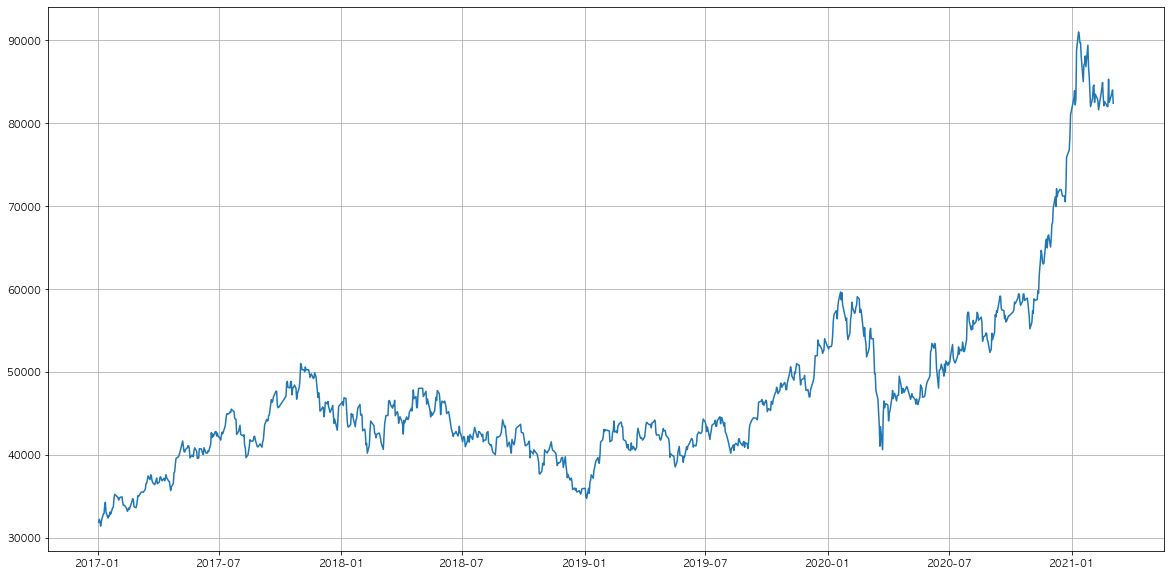

In [42]:
# 수정 종가 바차트
plt.figure(figsize=(20, 10))
plt.plot(samsungDF['Adj Close'])
plt.grid()
plt.show()

### 인덱스가 시계열 데이터인 경우 적용되는 인덱싱, 슬라이싱

In [47]:
# 2021년 데이터 인덱싱
samsungDF['2021']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,84400.0,80200.0,81000.0,83000.0,38655276.0,83000.0
2021-01-05,83900.0,81600.0,81600.0,83900.0,35335669.0,83900.0
2021-01-06,84500.0,82100.0,83300.0,82200.0,42089013.0,82200.0
2021-01-07,84200.0,82700.0,82800.0,82900.0,32644642.0,82900.0
2021-01-08,90000.0,83000.0,83300.0,88800.0,59013307.0,88800.0
2021-01-11,96800.0,89500.0,90000.0,91000.0,90306177.0,91000.0
2021-01-12,91400.0,87800.0,90300.0,90600.0,48682416.0,90600.0
2021-01-13,91200.0,89100.0,89800.0,89700.0,36068848.0,89700.0
2021-01-14,90000.0,88700.0,88700.0,89700.0,26393970.0,89700.0


In [49]:
# 2021년 1월 데이터 인덱싱
samsungDF['2021-1']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,84400.0,80200.0,81000.0,83000.0,38655276.0,83000.0
2021-01-05,83900.0,81600.0,81600.0,83900.0,35335669.0,83900.0
2021-01-06,84500.0,82100.0,83300.0,82200.0,42089013.0,82200.0
2021-01-07,84200.0,82700.0,82800.0,82900.0,32644642.0,82900.0
2021-01-08,90000.0,83000.0,83300.0,88800.0,59013307.0,88800.0
2021-01-11,96800.0,89500.0,90000.0,91000.0,90306177.0,91000.0
2021-01-12,91400.0,87800.0,90300.0,90600.0,48682416.0,90600.0
2021-01-13,91200.0,89100.0,89800.0,89700.0,36068848.0,89700.0
2021-01-14,90000.0,88700.0,88700.0,89700.0,26393970.0,89700.0


In [54]:
# 2021년 1월 15일부터 29일까지 데이터 슬라이싱(끝 인덱스 포함)
samsungDF['2021-01-15':'2021-01-29']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-15,91800.0,88000.0,89800.0,88000.0,33431809.0,88000.0
2021-01-18,87300.0,84100.0,86600.0,85000.0,43227951.0,85000.0
2021-01-19,88000.0,83600.0,84500.0,87000.0,39895044.0,87000.0
2021-01-20,89000.0,86500.0,89000.0,87200.0,25211127.0,87200.0
2021-01-21,88600.0,86500.0,87500.0,88100.0,25318011.0,88100.0
2021-01-22,89700.0,86800.0,89000.0,86800.0,30861661.0,86800.0
2021-01-25,89900.0,86300.0,87000.0,89400.0,27258534.0,89400.0
2021-01-26,89200.0,86500.0,88800.0,86700.0,33178936.0,86700.0
2021-01-27,87700.0,85600.0,86600.0,85600.0,26423070.0,85600.0


In [57]:
# 연도별 평균 데이터 
samsungDF.groupby(samsungDF.index.year).mean()
samsungDF.pivot_table(index=samsungDF.index.year)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017,41121.356237,46300.502092,46713.221757,45887.949791,46285.355649,1.148688e+07
2018,42588.249338,46823.471074,47346.942149,46335.165289,46860.785124,1.259780e+07
2019,43768.266040,46557.959184,46965.306122,46098.571429,46541.632653,1.089198e+07
2020,55275.358146,57167.741935,57828.225806,56498.588710,57144.758065,2.174733e+07
2021,84819.512195,84819.512195,86241.463415,83780.487805,84814.634146,3.109873e+07


In [62]:
# 연, 월별 평균 데이터
samsungDF.groupby([samsungDF.index.year, samsungDF.index.month]).mean()
samsungDF.pivot_table(index=[samsungDF.index.year, samsungDF.index.month])

Adj Close         Close          High           Low  \
Date Date                                                           
2017 1     33124.386328  37486.000000  37826.000000  37079.000000   
     2     34083.143359  38571.000000  38912.000000  38276.000000   
     3     36387.761009  41166.363636  41447.272727  40740.909091   
     4     37201.599414  41959.000000  42261.000000  41549.000000   
     5     40385.910567  45550.526316  46040.000000  45188.421053   
     6     41305.460565  46574.285714  46869.523810  46216.190476   
     7     43921.923177  49393.333333  49745.714286  48939.047619   
     8     41667.596058  46858.181818  47323.636364  46495.454545   
     9     44664.065820  50214.000000  50516.000000  49716.000000   
     10    48114.182373  53961.250000  54593.750000  53442.500000   
     11    49366.717969  55366.000000  56005.000000  54952.000000   
     12    45280.763889  50733.333333  51328.888889  50258.888889   
2018 1     44923.484933  49933.333333  50688.571429  49367.619048   
     2     42508.372830  47248.888889  48043.333333  46793.333333   
     3     44729.819568  49683.809524  50141.904762  49035.238095   
     4     45461.295945  50163.809524  50606.666667  49520.000000   
     5     46311.988672  51102.500000  51835.000000  50647.500000   
     6     43869.747944  48371.052632  48905.263158  47907.894737   
     7     42199.145419  46220.454545  46704.545455  45890.909091   
     8     41950.147372  45947.727273  46229.545455  45431.818182   
     9     42094.912914  46064.705882  46476.470588  45620.588235   
     10    40106.204241  43600.000000  44169.047619  43133.333333   
     11    39913.470982  43390.476190  43807.142857  42857.142857   
     12    36669.626028  39826.315789  40260.526316  39515.789474   
2019 1     38622.992010  41600.000000  41902.272727  40970.454545   
     2     42994.838925  46308.823529  46779.411765  45861.764706   
     3     41403.853320  44560.000000  45010.000000  44072.500000   
     4     43101.535334  46061.363636  46490.909091  45611.363636   
     5     40259.169643  43023.809524  43573.809524  42602.380952   
     6     42018.735609  44865.789474  45057.894737  44357.894737   
     7     43583.104110  46215.217391  46619.565217  45865.217391   
     8     41343.614025  43840.476190  44254.761905  43483.333333   
     9     44636.196752  47294.736842  47526.315789  46750.000000   
     10    47380.974516  49880.952381  50376.190476  49516.666667   
     11    49579.044922  52195.000000  52655.000000  51730.000000   
     12    50860.066016  53507.500000  53982.500000  53002.500000   
2020 1     56226.541406  58815.000000  59475.000000  58195.000000   
     2     56484.657813  59085.000000  59675.000000  58330.000000   
     3     48147.378551  50331.818182  51440.909091  49325.000000   
     4     47232.697461  49045.000000  49567.500000  48445.000000   
     5     47285.665296  49100.000000  49476.315789  48626.315789   
     6     51059.209517  52986.363636  53768.181818  52218.181818   
     7     53056.237262  54726.086957  55356.521739  54256.521739   
     8     55241.377734  56980.000000  57865.000000  56600.000000   
     9     56434.125372  58176.190476  58761.904762  57709.523810   
     10    58270.365543  59736.842105  60242.105263  59263.157895   
     11    61862.177083  63419.047619  64019.047619  62476.190476   
     12    71998.000000  73619.047619  74233.333333  72600.000000   
2021 1     86565.000000  86565.000000  88410.000000  85190.000000   
     2     83127.777778  83127.777778  84177.777778  82400.000000   
     3     83333.333333  83333.333333  84166.666667  82666.666667   

                   Open        Volume  
Date Date                              
2017 1     37340.000000  1.102530e+07  
     2     38578.000000  1.192612e+07  
     3     40890.000000  1.193883e+07  
     4     41910.000000  1.191310e+07  
     5     45590.526316  1.358061e+07  
     6     46460.952381  1.101470e+07  
     7     49334.285714  1.058194e+0

### resample

In [64]:
# 월별 평균
samsungDF.resample("M").mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-31,37826.000000,37079.000000,37340.000000,37486.000000,1.102530e+07,33124.386328
2017-02-28,38912.000000,38276.000000,38578.000000,38571.000000,1.192612e+07,34083.143359
2017-03-31,41447.272727,40740.909091,40890.000000,41166.363636,1.193883e+07,36387.761009
2017-04-30,42261.000000,41549.000000,41910.000000,41959.000000,1.191310e+07,37201.599414
2017-05-31,46040.000000,45188.421053,45590.526316,45550.526316,1.358061e+07,40385.910567
2017-06-30,46869.523810,46216.190476,46460.952381,46574.285714,1.101470e+07,41305.460565
2017-07-31,49745.714286,48939.047619,49334.285714,49393.333333,1.058194e+07,43921.923177
2017-08-31,47323.636364,46495.454545,47096.363636,46858.181818,1.218491e+07,41667.596058
2017-09-30,50516.000000,49716.000000,50023.000000,50214.000000,1.014741e+07,44664.065820


In [65]:
# 주별 평균
samsungDF.resample('W').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-08,36376.000000,35916.000000,36200.000000,36100.000000,7.965680e+06,31899.651953
2017-01-15,38116.000000,37300.000000,37500.000000,37800.000000,1.238729e+07,33401.850781
2017-01-22,37624.000000,36684.000000,37064.000000,37048.000000,1.044830e+07,32737.348047
2017-01-29,39010.000000,38155.000000,38270.000000,38880.000000,1.212688e+07,34356.190430
2017-02-05,39680.000000,39220.000000,39610.000000,39350.000000,1.438956e+07,34771.507812
...,...,...,...,...,...,...
2021-02-07,84600.000000,82540.000000,83440.000000,83600.000000,2.373393e+07,83600.000000
2021-02-14,83866.666667,82433.333333,83466.666667,82433.333333,1.975429e+07,82433.333333
2021-02-21,84220.000000,82720.000000,83540.000000,83400.000000,2.190582e+07,83400.000000


In [66]:
# 수요일 기준 주별 평균
samsungDF.resample('W-WED').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-04,36460.000000,36000.000000,36253.333333,36246.666667,6.660000e+06,32029.253906
2017-01-11,37192.000000,36528.000000,36728.000000,36900.000000,1.083225e+07,32606.570703
2017-01-18,37980.000000,36992.000000,37316.000000,37364.000000,1.225224e+07,33016.577734
2017-01-25,38276.000000,37420.000000,37700.000000,38060.000000,1.037938e+07,33631.599219
2017-02-01,39853.333333,39306.666667,39620.000000,39493.333333,1.578570e+07,34898.164062
...,...,...,...,...,...,...
2021-02-10,83880.000000,82380.000000,83400.000000,82660.000000,2.029428e+07,82660.000000
2021-02-17,84900.000000,83500.000000,84066.666667,84100.000000,2.077351e+07,84100.000000
2021-02-24,83420.000000,81540.000000,82460.000000,82180.000000,2.400468e+07,82180.000000


In [67]:
# 분기별 평균
samsungDF.resample('Q').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-31,39461.290323,38764.516129,38999.032258,39141.935484,1.164004e+07,34591.634451
2017-06-30,45070.666667,44335.000000,44668.333333,44711.666667,1.212670e+07,39646.316016
2017-09-30,49144.444444,48332.380952,48771.428571,48768.571429,1.100376e+07,43370.298673
2017-12-31,54028.148148,52940.370370,53547.407407,53405.555556,1.116375e+07,47633.611617
2018-03-31,49703.666667,48479.000000,49126.000000,49040.666667,1.534626e+07,44131.168424
2018-06-30,50477.333333,49385.333333,50009.166667,49909.000000,1.393414e+07,45240.869987
2018-09-30,46469.672131,45650.000000,46051.639344,46078.688525,9.944799e+06,42080.294442
2018-12-31,42827.049180,41911.475410,42345.081967,42352.459016,1.123298e+07,38969.443840
2019-03-31,44361.016949,43431.355932,43903.389831,43960.169492,1.220284e+07,40825.341565
